In [1]:
import sklearn
print(sklearn.__version__)

0.21.3


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler, scale

In [8]:
df = pd.read_csv('Absenteeism_at_work.csv',delimiter=',')
df.shape

(740, 21)

In [9]:
df.sample(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
640,9,25,3,4,2,228,14,16,58,222.196,...,0,1,2,0,0,1,65,172,22,2
204,11,13,5,4,3,289,36,13,33,378.884,...,0,1,2,1,0,1,90,172,30,8
347,3,28,12,6,4,179,51,18,38,236.629,...,0,1,0,1,0,0,89,170,31,1
286,15,28,9,6,4,291,31,12,40,294.217,...,0,1,1,1,0,1,73,171,25,3
35,10,23,8,2,1,361,52,3,28,205.917,...,0,1,1,1,0,4,80,172,27,1
278,3,13,9,4,1,179,51,18,38,294.217,...,0,1,0,1,0,0,89,170,31,8
218,36,13,5,4,3,118,13,18,50,378.884,...,0,1,1,1,0,0,98,178,31,24
296,34,7,10,2,4,118,10,10,37,265.017,...,0,1,0,0,0,0,83,172,28,3
293,36,0,10,6,4,118,13,18,50,265.017,...,1,1,1,1,0,0,98,178,31,0
98,33,23,12,3,4,248,25,14,47,261.306,...,0,1,2,0,0,1,86,165,32,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [11]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [12]:
df = df [['Transportation expense','Distance from Residence to Work','Age','Weight','Height','Work load Average/day ','Absenteeism time in hours']]
df

,Transportation expense,Distance from Residence to Work,Age,Weight,Height,Work load Average/day,Absenteeism time in hours
0,289,36,33,90,172,239.554,4
1,118,13,50,98,178,239.554,0
2,179,51,38,89,170,239.554,2
3,279,5,39,68,168,239.554,4
4,289,36,33,90,172,239.554,2
...,...,...,...,...,...,...,...
735,289,36,33,90,172,264.604,8
736,235,11,37,88,172,264.604,4
737,118,14,40,98,170,271.219,0
738,231,35,39,100,170,271.219,0


In [13]:
# Convert all datatypes to Float64
# Prerequisite for SKlearn Standard Scaler
df.info()
df = df.astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Age                                740 non-null int64
Weight                             740 non-null int64
Height                             740 non-null int64
Work load Average/day              740 non-null float64
Absenteeism time in hours          740 non-null int64
dtypes: float64(1), int64(6)
memory usage: 40.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Age                                740 non-null float64
Weight                             740 non-null float64
Height                             740 non-null float64
Work load Average/day              740 non-null float64
Absenteeism time in hours

In [14]:
print('Transportation expense Mean : ',df['Transportation expense'].mean())
print('Transportation expense Median: ',df['Transportation expense'].median())
print('Transportation expense variance: ',df['Transportation expense'].var())
print('Transportation expense Std Deviation', df['Transportation expense'].std())

Transportation expense Mean :  221.32972972972973
Transportation expense Median:  225.0
Transportation expense variance:  4482.6001974911205
Transportation expense Std Deviation 66.95222324531964


In [15]:
df.describe()

,Transportation expense,Distance from Residence to Work,Age,Weight,Height,Work load Average/day,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,36.450000,79.035135,172.114865,271.490235,6.924324
std,66.952223,14.836788,6.478772,12.883211,6.034995,39.058116,13.330998
min,118.000000,5.000000,27.000000,56.000000,163.000000,205.917000,0.000000
25%,179.000000,16.000000,31.000000,69.000000,169.000000,244.387000,2.000000
50%,225.000000,26.000000,37.000000,83.000000,170.000000,264.249000,3.000000
75%,260.000000,50.000000,40.000000,89.000000,172.000000,294.217000,8.000000
max,388.000000,52.000000,58.000000,108.000000,196.000000,378.884000,120.000000


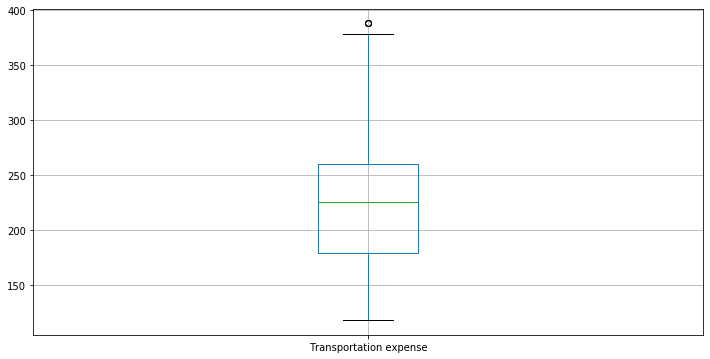

In [16]:
df.boxplot(column=['Transportation expense'],figsize=(12,6))
plt.show()

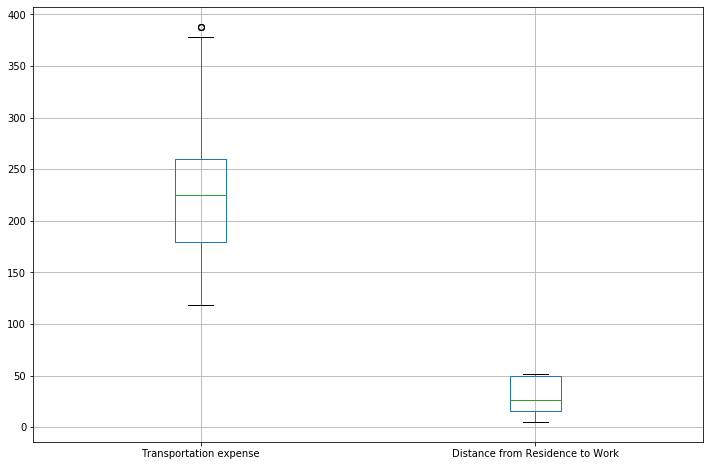

In [17]:
df.boxplot(['Transportation expense','Distance from Residence to Work'], figsize=(12,8))
plt.show()

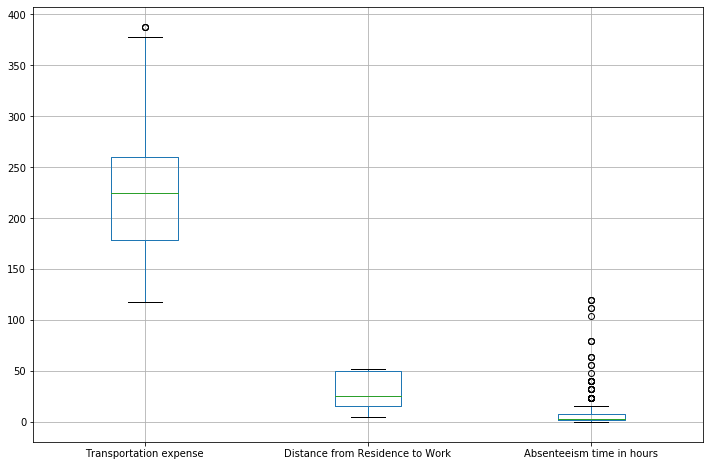

In [18]:
df.boxplot(['Transportation expense','Distance from Residence to Work','Absenteeism time in hours'], figsize=(12,8))
plt.show()

In [19]:
scaled_df = pd.DataFrame()

In [20]:
# x = x - mean(x) / std dev(x)
scaled_df['Transportation expense'] = (df['Transportation expense'] - np.mean(df['Transportation expense'])) / np.std(df['Transportation expense']) 
scaled_df['Transportation expense']

0      1.011408
1     -1.544379
2     -0.632665
3      0.861947
4      1.011408
         ...   
735    1.011408
736    0.204318
737   -1.544379
738    0.144533
739   -0.632665
Name: Transportation expense, Length: 740, dtype: float64

In [21]:
scaled_df['Distance from Residence to Work'] = (df['Distance from Residence to Work'] - np.mean(df['Distance from Residence to Work'])) / np.std(df['Distance from Residence to Work']) 
scaled_df['Distance from Residence to Work']

0      0.429556
1     -1.121694
2      1.441240
3     -1.661258
4      0.429556
         ...   
735    0.429556
736   -1.256585
737   -1.054248
738    0.362110
739    1.036566
Name: Distance from Residence to Work, Length: 740, dtype: float64

In [22]:
scaled_df['Absenteeism time in hours'] = (df['Absenteeism time in hours'] - np.mean(df['Absenteeism time in hours'])) / np.std(df['Absenteeism time in hours']) 
scaled_df['Absenteeism time in hours']

0     -0.219511
1     -0.519767
2     -0.369639
3     -0.219511
4     -0.369639
         ...   
735    0.080744
736   -0.219511
737   -0.519767
738   -0.519767
739   -0.519767
Name: Absenteeism time in hours, Length: 740, dtype: float64

In [23]:
scaled_df.head()

,Transportation expense,Distance from Residence to Work,Absenteeism time in hours
0,1.011408,0.429556,-0.219511
1,-1.544379,-1.121694,-0.519767
2,-0.632665,1.441240,-0.369639
3,0.861947,-1.661258,-0.219511
4,1.011408,0.429556,-0.369639


In [24]:
scaled_df.describe()

,Transportation expense,Distance from Residence to Work,Absenteeism time in hours
count,7.400000e+02,7.400000e+02,7.400000e+02
mean,-1.485298e-17,-2.436489e-16,-3.150633e-17
std,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,8.487898e+00


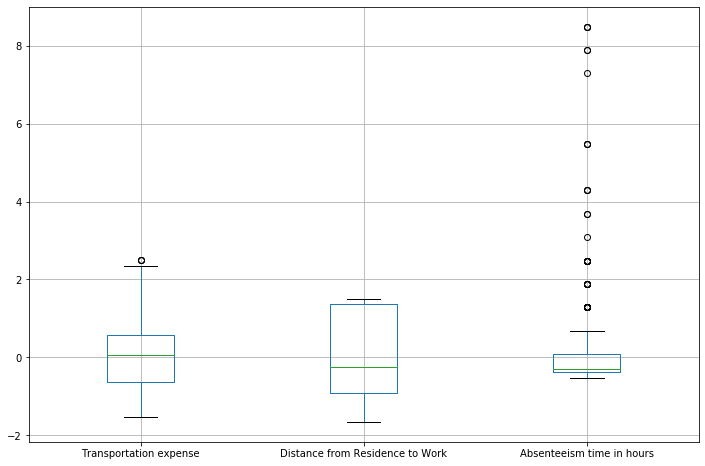

In [25]:
scaled_df.boxplot(['Transportation expense','Distance from Residence to Work','Absenteeism time in hours'], figsize=(12,8))
plt.show()